# Options

Let's price fucking options. Yes.

In [1]:
import matplotlib.pyplot as plt
from autograd import numpy as np

In [351]:
from autograd.scipy.stats import norm
from scipy.stats import binom


def bopm(S, K, r, u, n):
    u = u ** (1 / n)
    r = r ** (1 / n)

    d = 1 / u
    q  = (r - d) / (u - d)
    qp = q * (u / r)
    a = np.ceil(np.log(K / (S * d ** n)) / np.log(u / d))

    return S * (1 - binom.cdf(a - 1, n, qp)) - K / r ** n * (1 - binom.cdf(a - 1, n, q))

def bms(S, K, r, sig, t):
    x = (np.log(S / K) + t * (r + 1 / 2 * sig ** 2)) / (sig * np.sqrt(t))
    return S * norm.cdf(x) - K * np.exp(-r * t) * norm.cdf(x - sig * np.sqrt(t))

bopm(100, 100, 1.02, 1.1, 10)

2.385197589196977

8.916037278572539


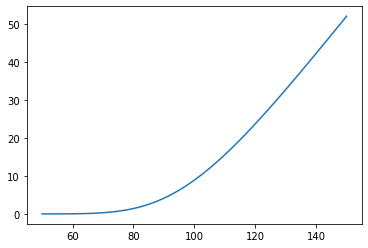

In [352]:
S0 = np.linspace(50, 150, 100)
K = 100
r = 0.02
sig = 0.2
t = 1

print(bms(100, K, r, sig, t))
plt.plot(S0, bms(S0, K, r, sig, t))

## Using deribit data

Use bitcoin options data to find $\sigma, r$. Riskless interest rate in bitcoin should be aligned with futures curve ?

In [353]:
import websockets
import asyncio as aio
import json
from datetime import datetime

In [354]:
url = 'wss://www.deribit.com/ws/api/v2'


async def api(msg):
    async with websockets.connect(url) as ws:
        await ws.send(json.dumps(msg))
        return json.loads(await ws.recv())

async def instruments(currency):
    msg = {
        "jsonrpc": "2.0",
        "method": "public/get_instruments",
        "id": 7617,
        "params": {
            "currency": currency,
            "kind": "option",
            "expired": False,
        }
    }

    return await api(msg)

async def ticker(instrument):
    msg = {
        "jsonrpc": "2.0",
        "method": "public/ticker",
        "id": 7617,
        "params": {
            "instrument_name": instrument,
        }
    }

    return await api(msg)

def ts(dt):
    return int(1000 * dt.timestamp())

In [490]:
instrs = await instruments('BTC')
instrs = {e['instrument_name'] for e in instrs['result']}
instrs

{'BTC-14MAY21-25000-C',
 'BTC-14MAY21-25000-P',
 'BTC-14MAY21-30000-C',
 'BTC-14MAY21-30000-P',
 'BTC-14MAY21-35000-C',
 'BTC-14MAY21-35000-P',
 'BTC-14MAY21-40000-C',
 'BTC-14MAY21-40000-P',
 'BTC-14MAY21-42000-C',
 'BTC-14MAY21-42000-P',
 'BTC-14MAY21-44000-C',
 'BTC-14MAY21-44000-P',
 'BTC-14MAY21-45000-C',
 'BTC-14MAY21-45000-P',
 'BTC-14MAY21-46000-C',
 'BTC-14MAY21-46000-P',
 'BTC-14MAY21-48000-C',
 'BTC-14MAY21-48000-P',
 'BTC-14MAY21-50000-C',
 'BTC-14MAY21-50000-P',
 'BTC-14MAY21-52000-C',
 'BTC-14MAY21-52000-P',
 'BTC-14MAY21-54000-C',
 'BTC-14MAY21-54000-P',
 'BTC-14MAY21-56000-C',
 'BTC-14MAY21-56000-P',
 'BTC-14MAY21-58000-C',
 'BTC-14MAY21-58000-P',
 'BTC-14MAY21-60000-C',
 'BTC-14MAY21-60000-P',
 'BTC-14MAY21-62000-C',
 'BTC-14MAY21-62000-P',
 'BTC-14MAY21-64000-C',
 'BTC-14MAY21-64000-P',
 'BTC-14MAY21-65000-C',
 'BTC-14MAY21-65000-P',
 'BTC-14MAY21-66000-C',
 'BTC-14MAY21-66000-P',
 'BTC-14MAY21-70000-C',
 'BTC-14MAY21-70000-P',
 'BTC-14MAY21-75000-C',
 'BTC-14MAY21-75

In [498]:
# await ticker(next(iter(instrs)))

atget = datetime.now()
prices = {instr: (await ticker(instr))['result']['best_bid_price'] for instr in instrs}
prices

{'BTC-25JUN21-48000-C': 0.1955,
 'BTC-30APR21-48000-C': 0.105,
 'BTC-24SEP21-64000-C': 0.166,
 'BTC-25JUN21-72000-P': 0.0,
 'BTC-30APR21-66000-C': 0.0005,
 'BTC-25JUN21-22000-P': 0.002,
 'BTC-28MAY21-50000-C': 0.1305,
 'BTC-30APR21-84000-C': 0.0,
 'BTC-24SEP21-8000-C': 0.8565,
 'BTC-7MAY21-30000-C': 0.0,
 'BTC-31DEC21-64000-P': 0.279,
 'BTC-25JUN21-6000-P': 0.0,
 'BTC-24SEP21-32000-C': 0.4745,
 'BTC-25JUN21-52000-P': 0.0925,
 'BTC-27APR21-43000-P': 0.0,
 'BTC-25MAR22-400000-C': 0.0235,
 'BTC-30APR21-50000-C': 0.0715,
 'BTC-30APR21-62000-C': 0.002,
 'BTC-25JUN21-14000-C': 0.741,
 'BTC-30APR21-50000-P': 0.0075,
 'BTC-30APR21-66000-P': 0.0,
 'BTC-7MAY21-54000-P': 0.0465,
 'BTC-25JUN21-28000-P': 0.006,
 'BTC-14MAY21-25000-C': 0.0,
 'BTC-31DEC21-300000-P': 0.151,
 'BTC-7MAY21-80000-C': 0.0005,
 'BTC-25JUN21-88000-P': 0.0,
 'BTC-25JUN21-56000-P': 0.1295,
 'BTC-31DEC21-60000-C': 0.2505,
 'BTC-27APR21-52000-P': 0.0025,
 'BTC-7MAY21-50000-P': 0.02,
 'BTC-24SEP21-12000-C': 0.7895,
 'BTC-14MAY21-

In [499]:
import pandas as pd


df = pd.DataFrame(
    [[*instr.split('-'), price] for instr, price in prices.items()],
    columns=['currency', 'expiration', 'strike', 'type', 'price'],
)

df.expiration = pd.to_datetime(df.expiration)
df.strike = df.strike.astype(int)
df.price = df.price.astype(float)

df = df.sort_values(by=['expiration', 'strike'])

df

,currency,expiration,strike,type,price
213,BTC,2021-04-27,42000,P,0.0000
230,BTC,2021-04-27,42000,C,0.0000
14,BTC,2021-04-27,43000,P,0.0000
325,BTC,2021-04-27,43000,C,0.0000
88,BTC,2021-04-27,44000,P,0.0000
...,...,...,...,...,...
309,BTC,2022-03-25,250000,P,0.0000
387,BTC,2022-03-25,300000,P,0.0000
424,BTC,2022-03-25,300000,C,0.0345
15,BTC,2022-03-25,400000,C,0.0235


## 3D graphs to get an idea


In [500]:
from mpl_toolkits import mplot3d

Interaction between spot price, expiration time and call price.

<ipython-input-351-be666c70221a>:17: RuntimeWarning: divide by zero encountered in true_divide
  x = (np.log(S / K) + t * (r + 1 / 2 * sig ** 2)) / (sig * np.sqrt(t))


Text(0.5, 0, 'price')

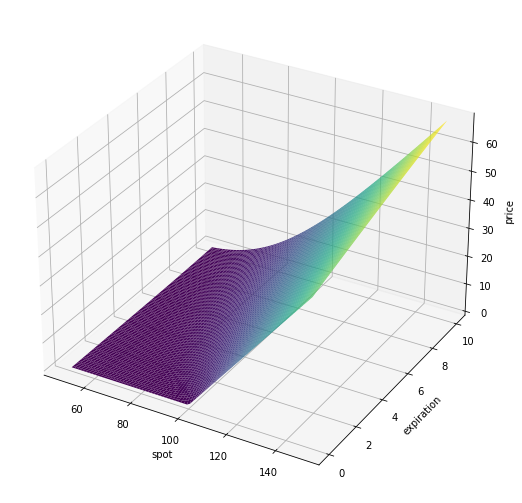

In [501]:
K = 100
r = 0.02
sig = 0.1
s = np.linspace(50, 150, 80)
t = np.linspace(0, 10, 100)
S, T = np.meshgrid(s, t)
C = bms(S, K, r, sig, T)

fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(S, T, C, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.contour3D(S, T, C, 50, cmap='binary')

ax.set_xlabel('spot')
ax.set_ylabel('expiration')
ax.set_zlabel('price')

Text(0.5, 0, 'price')

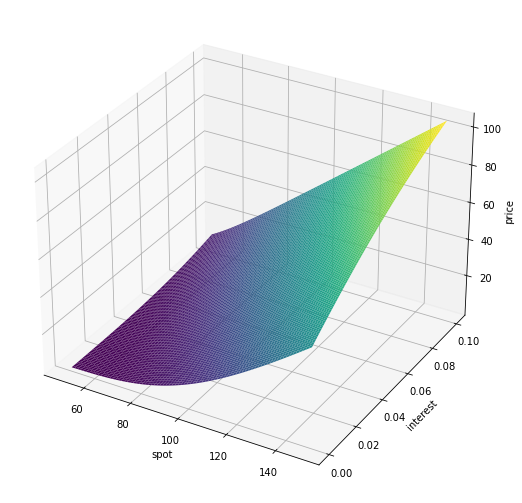

In [502]:
K = 100
t = 8
sig = 0.1
s = np.linspace(50, 150, 80)
r = np.linspace(0, 0.1, 100)
S, R = np.meshgrid(s, r)
C = bms(S, K, R, sig, t)

fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(S, R, C, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('spot')
ax.set_ylabel('interest')
ax.set_zlabel('price')

## Finding $\sigma$

The call price doesn't always increase with volatility: when the option has high moneyness and/or when it is close to its term, volatility has a negative influence on price. To be more precise, volatility is a positive influence if and only if:

$$
e^{\frac{1}{2} \sigma^2 - r} > \left ( \frac{S}{K} \right )^{1 / t}
$$

Therefore our optimization here does not necessarily converge. We must use some other

0.03 0.0015


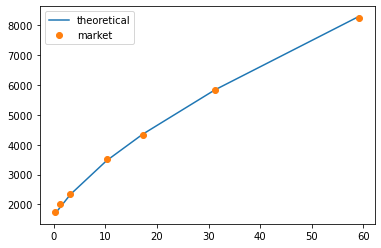

In [516]:
from autograd import grad, hessian

def time_to_exp(expi):
    return (expi - atget).total_seconds() / (3600 * 24)


S, K = 53666, 52000
calls = df[(df.type == 'C') & (df.strike == K)]

expirations = calls.expiration.dt.to_pydatetime()
expirations = [*map(time_to_exp, expirations)]
expirations = np.asarray(expirations)


cp = np.asarray(calls.price) * S

def loss(x):
    sig, r = x
    p = bms(S=S, K=K, r=r, sig=sig, t=expirations)
    return np.mean((cp - p) ** 2)

def newton(f, x, n=1000, l=1):
    inv = np.linalg.pinv
    d, h = grad(f), hessian(f)

    for _ in range(n):
        x -= l * inv(h(x)) @ d(x)

    return x

sig, r = 0.03, 0.0015
x = np.asarray((sig, r))
# sig, r = newton(loss, x)

print(sig, r)

plt.plot(expirations, bms(S=S, K=K, r=r, sig=sig, t=expirations), label='theoretical')
plt.plot(expirations, cp, marker='o', linestyle='', label='market')
plt.legend()